Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.7368 - val_loss: 0.0921 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 871us/step - loss: 0.1010 - accuracy: 0.7763 - val_loss: 0.0890 - val_accuracy: 0.8500
Epoch 3/20
76/76 [==============================] - 0s 882us/step - loss: 0.0865 - accuracy: 0.8421 - val_loss: 0.0907 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 905us/step - loss: 0.0779 - accuracy: 0.8421 - val_loss: 0.0858 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 950us/step - loss: 0.0699 - accuracy: 0.8816 - val_loss: 0.0852 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 870us/step - loss: 0.0633 - accuracy: 0.8816 - val_loss: 0.0881 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 868us/step - loss: 0.0578 - accuracy: 0.8947 - val

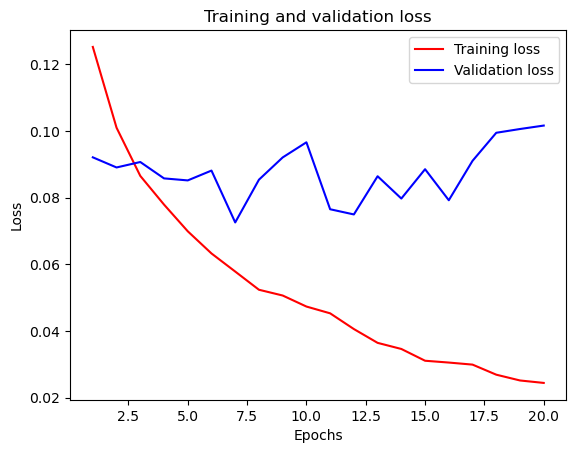

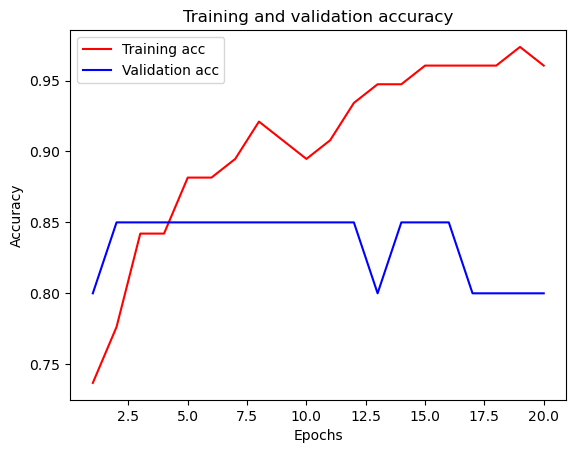

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))

model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")


# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs + 1))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 0.9666666388511658
Fold accuracy: 0.9333333373069763
Fold accuracy: 0.7666666507720947
Fold accuracy: 0.800000011920929
Mean accuracy: 0.8666666597127914


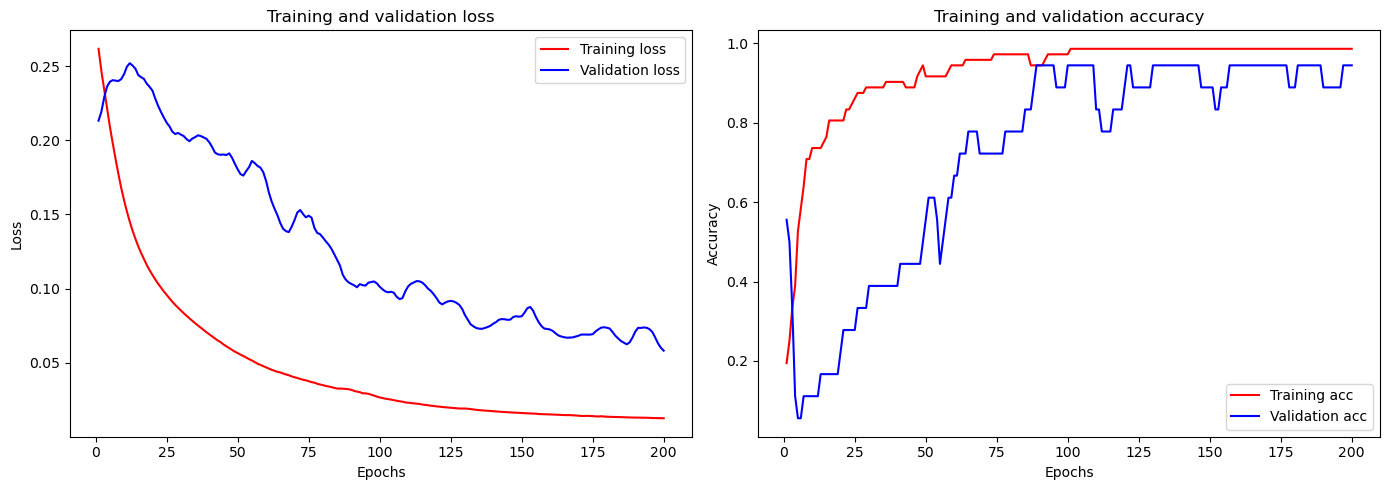

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 20
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 0.9333333373069763
Fold accuracy: 0.9333333373069763
Fold accuracy: 0.8333333134651184
Fold accuracy: 0.7333333492279053
Mean accuracy: 0.8583333343267441


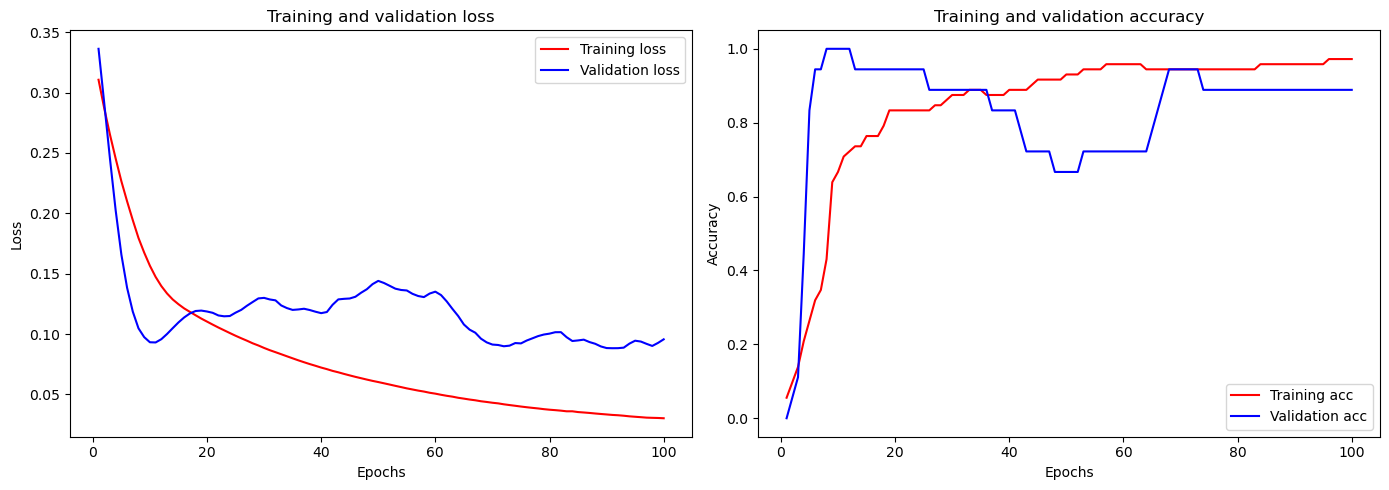

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 100
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 1.0
Fold accuracy: 0.8999999761581421
Fold accuracy: 0.949999988079071
Fold accuracy: 0.800000011920929
Fold accuracy: 0.8999999761581421
Fold accuracy: 0.75
Mean accuracy: 0.8833333253860474


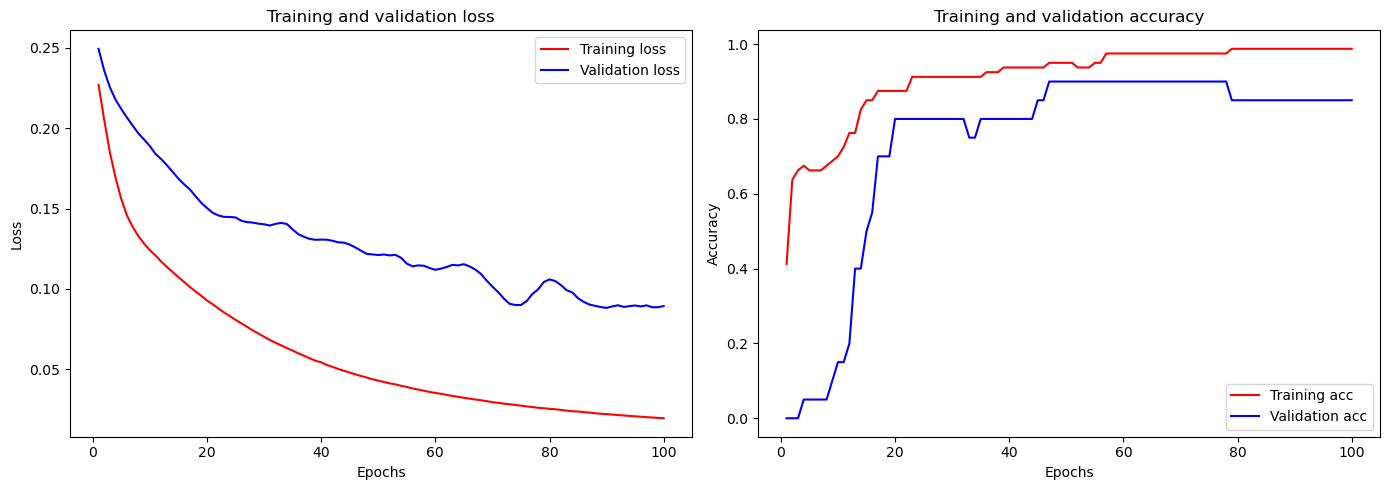

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 100
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=32, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 0.949999988079071
Fold accuracy: 0.8999999761581421
Fold accuracy: 1.0
Fold accuracy: 0.75
Fold accuracy: 0.8500000238418579
Fold accuracy: 0.800000011920929
Mean accuracy: 0.875


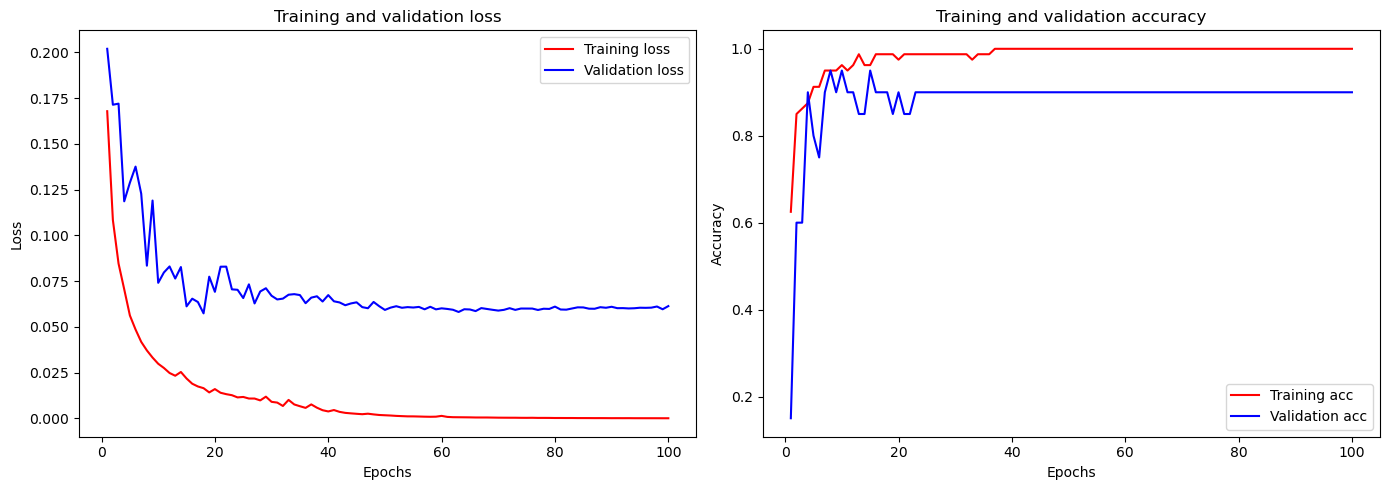

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    # Train the model
    val_epochs = 100
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, val_epochs + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Fold accuracy: 0.8666666746139526
Fold accuracy: 0.9666666388511658
Fold accuracy: 0.7333333492279053
Fold accuracy: 0.800000011920929
Mean accuracy: 0.8416666686534882


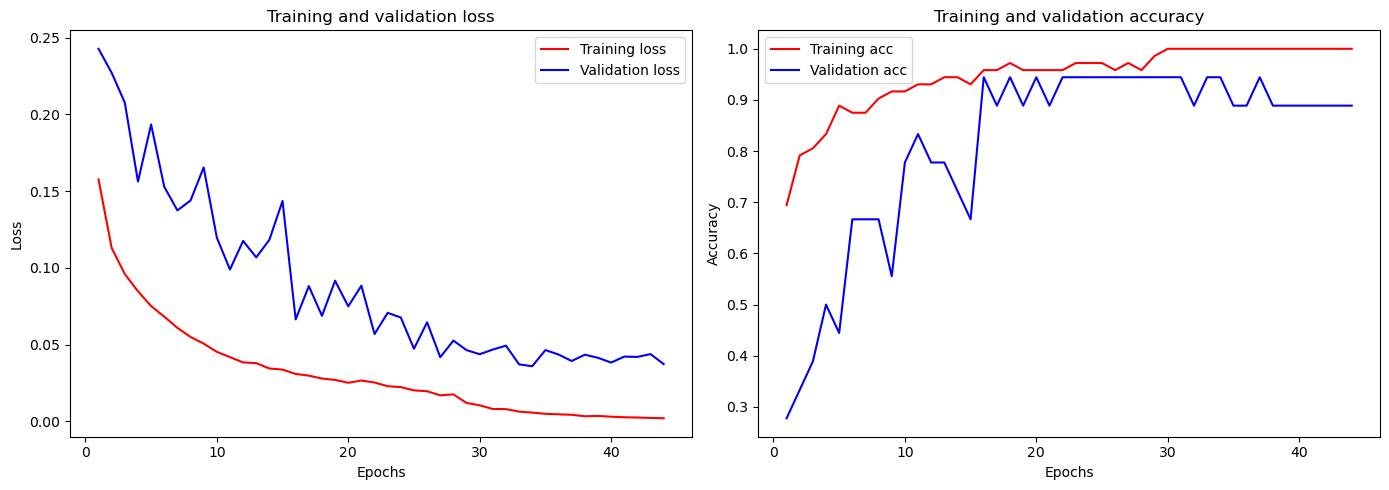

In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models, layers, optimizers
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

accuracies = []
histories = []

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

for train_index, test_index in kf.split(features):
    # Split the data into train and test sets
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit and transform the training labels
    y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
    
    # Transform the testing labels
    y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))
    
    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(32, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(8, activation='tanh'))
    model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    
    # Train the model with early stopping
    val_epochs = 100
    history = model.fit(X_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, 
                        validation_split=0.2, verbose=0, callbacks=[early_stopping])
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
    print(f"Fold accuracy: {test_accuracy}")
    
    accuracies.append(test_accuracy)
    histories.append(history.history)

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

# Optional: Plotting training and validation accuracy for the last fold
history_dict = histories[-1]
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Using TensorFlow backend.
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vikum\anaconda3\envs\pyOld\lib\site-pa


Train on 76 samples, validate on 20 samples
Epoch 1/20
76/76 [==============================] - 0s 3ms/step - loss: 0.1676 - accuracy: 0.6579 - val_loss: 0.1268 - val_accuracy: 0.8000
Epoch 2/20
76/76 [==============================] - 0s 948us/step - loss: 0.1059 - accuracy: 0.8158 - val_loss: 0.1035 - val_accuracy: 0.8000
Epoch 3/20
76/76 [==============================] - 0s 935us/step - loss: 0.0918 - accuracy: 0.8158 - val_loss: 0.0929 - val_accuracy: 0.8500
Epoch 4/20
76/76 [==============================] - 0s 886us/step - loss: 0.0792 - accuracy: 0.8421 - val_loss: 0.0934 - val_accuracy: 0.8500
Epoch 5/20
76/76 [==============================] - 0s 776us/step - loss: 0.0701 - accuracy: 0.8816 - val_loss: 0.0877 - val_accuracy: 0.8500
Epoch 6/20
76/76 [==============================] - 0s 849us/step - loss: 0.0619 - accuracy: 0.8947 - val_loss: 0.0847 - val_accuracy: 0.8500
Epoch 7/20
76/76 [==============================] - 0s 982us/step - loss: 0.0556 - accuracy: 0.9079 - val

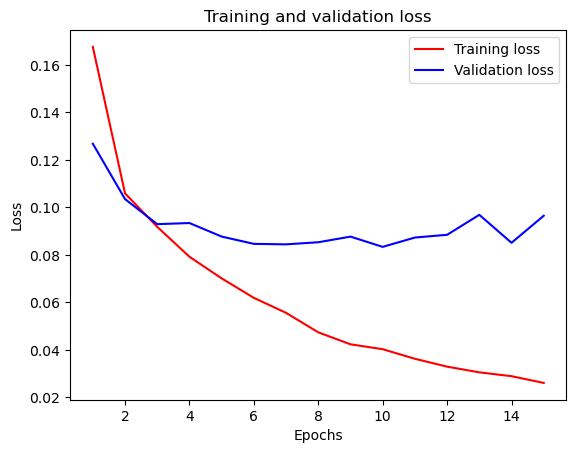

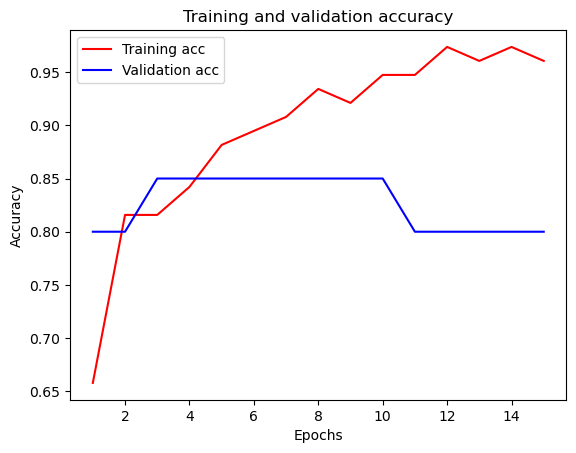

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Define the model
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(x_train_scaled.shape[1],)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
val_epochs = 20
history = model.fit(x_train_scaled, y_train_encoded, epochs=val_epochs, batch_size=1, 
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")

# Optional: Make predictions
predictions = model.predict(x_test_scaled)
print("Predictions shape:", predictions.shape)

# Plot training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
model.save('model_tanh.h5')


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import load_model
import numpy as np

# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

# Identify the target variable (assuming the column name is 'label')
target = df['label']

# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

# Scale the feature data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
target_encoded = encoder.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target_encoded, test_size=0.2, random_state=42)

# Load the model
model = load_model('model_tanh.h5')

# Make predictions
predictions = model.predict(x_test)

# Convert predictions from one-hot encoded back to original labels
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Map the predicted class indices back to the original labels
predicted_labels = encoder.categories_[0][predicted_classes]

# Print or analyze the predictions
print("Predicted class labels:", predicted_labels)
print("Actual class labels:", encoder.categories_[0][actual_classes])

# Calculate accuracy
accuracy = np.mean(predicted_classes == actual_classes)
print(f"Test accuracy: {accuracy}")


Predicted class labels: [2 2 1 2 1 2 2 1 2 3 1 2 1 1 3 3 3 1 3 3 2 3 1 2]
Actual class labels: [2 2 1 2 1 2 2 1 2 3 1 2 1 1 3 3 3 1 3 3 2 2 1 2]
Test accuracy: 0.9583333333333334
